<a href="https://colab.research.google.com/github/Viktoriia-kama/ML_hw4-hw16/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1

У цьому завданні вам потрібно завантажити датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [6]:
df_data_2d = pd.read_csv('data_2d.csv', header=None)

df_data_2d.columns = ['Index', 'Column1', 'Column2',]
df_data_2d = pd.DataFrame(df_data_2d)
df_data_2d.head()

,Index,Column1,Column2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [7]:
df_mnist = pd.read_csv('mnist.csv', header=None)
df_mnist = pd.DataFrame(df_mnist)
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_data_2d.isna().sum()

Index      0
Column1    0
Column2    0
dtype: int64

In [9]:
df_mnist.isna().sum().sum()

0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

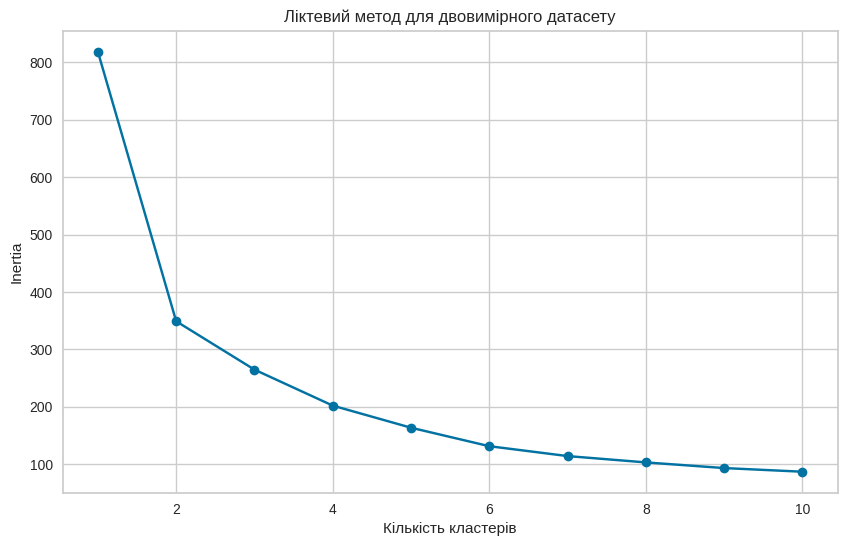

In [10]:
# Підготовка даних для K-means
df_data_2d = df_data_2d[['Column1', 'Column2']].values

# Використання ліктевого методу для визначення оптимальної кількості кластерів
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_data_2d)
    inertia.append(kmeans.inertia_)

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Ліктевий метод для двовимірного датасету')
plt.show()


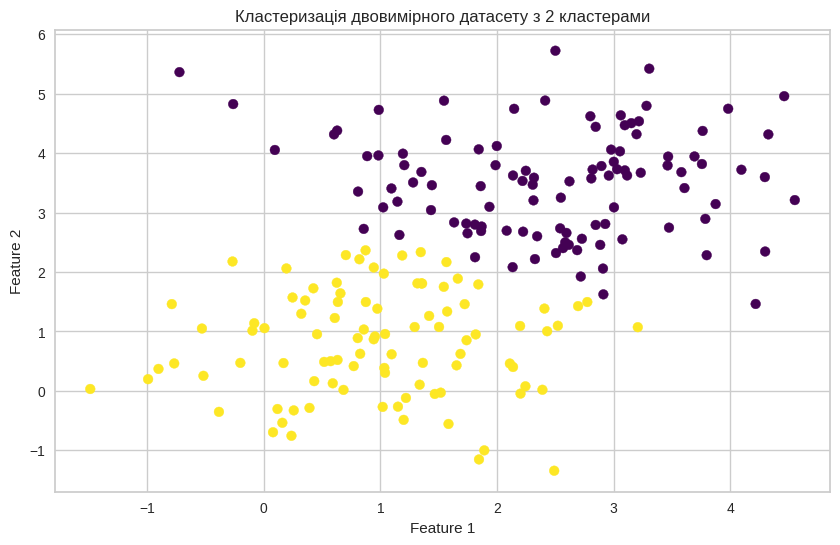

In [11]:
# Застосування K-means з 2 кластерами
kmeans_2d = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans_2d.fit(df_data_2d)
labels_2d = kmeans_2d.labels_

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
plt.scatter(df_data_2d[:, 0], df_data_2d[:, 1], c=labels_2d, cmap='viridis', marker='o')
plt.title('Кластеризація двовимірного датасету з 2 кластерами')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [12]:
# Нормалізація даних для mnist
scaler = StandardScaler()
scaled_df_mnist = scaler.fit_transform(df_mnist)
norm_df_mnist = normalize(scaled_df_mnist)

In [13]:
#PCA
pca = PCA()
pca.fit(norm_df_mnist)

PCA()

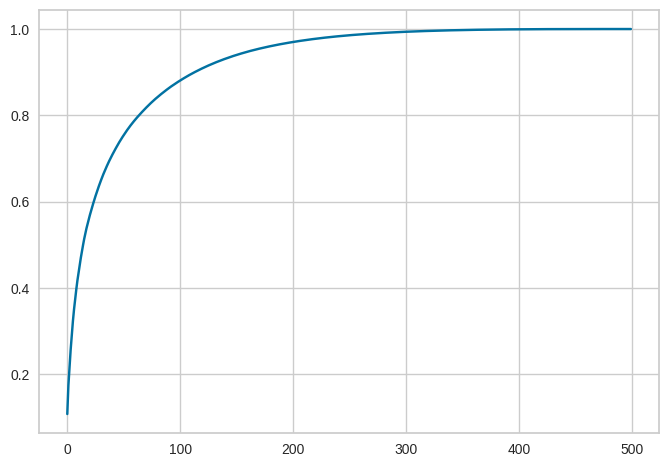

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [15]:
np.cumsum((pca.explained_variance_ratio_))

array([0.10802812, 0.17497675, 0.21762968, 0.25742961, 0.29185965,
       0.323686  , 0.35102038, 0.37489265, 0.39730941, 0.41790824,
       0.43588459, 0.45347096, 0.47006058, 0.48572415, 0.50005253,
       0.51409145, 0.52660265, 0.5382493 , 0.54876587, 0.55893091,
       0.56892013, 0.57814559, 0.58726712, 0.59620612, 0.6047889 ,
       0.61308542, 0.62099596, 0.62874721, 0.63628522, 0.64369759,
       0.65057295, 0.65740722, 0.6640485 , 0.67027203, 0.67636207,
       0.68230677, 0.68811778, 0.69367048, 0.6990306 , 0.70421789,
       0.70934105, 0.71431521, 0.71913853, 0.72388713, 0.7285843 ,
       0.73322756, 0.73765796, 0.74196283, 0.74621828, 0.75028949,
       0.75429358, 0.75827857, 0.76213078, 0.76588832, 0.76952499,
       0.77305489, 0.77657183, 0.77994279, 0.78326053, 0.78648162,
       0.78963482, 0.79270193, 0.7957169 , 0.79867763, 0.80161231,
       0.80448639, 0.80729432, 0.81009841, 0.81284109, 0.81554543,
       0.81823729, 0.82087371, 0.82348472, 0.82603826, 0.82853

In [16]:
n_components = 80
pca_final=PCA(n_components=n_components)
pca_final.fit(norm_df_mnist)
pca_df_mnist = pca_final.fit_transform(norm_df_mnist)

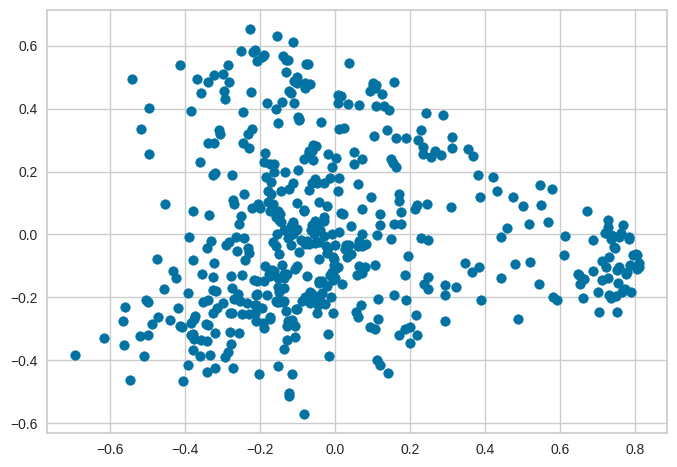

In [17]:
plt.scatter(pca_df_mnist[:,0], pca_df_mnist[:,1])

In [18]:
df_mnist = pd.DataFrame(df_mnist)

In [19]:
for i in np.arange(n_components):
  index = np.argmax(np.absolute(pca_final.get_covariance()[i]))
  max_cov = pca_final.get_covariance()[i][index]
  columns = df_mnist.columns[index]

  print("Principal components", i+1, "max cov:", "{:.10f}".format(max_cov), "from column", columns)

Principal components 1 max cov: 0.0025983535 from column 0
Principal components 2 max cov: 0.0003815092 from column 1
Principal components 3 max cov: 0.0003815092 from column 2
Principal components 4 max cov: 0.0003815092 from column 3
Principal components 5 max cov: 0.0003815092 from column 4
Principal components 6 max cov: 0.0003815092 from column 5
Principal components 7 max cov: 0.0003815092 from column 6
Principal components 8 max cov: 0.0003815092 from column 7
Principal components 9 max cov: 0.0003815092 from column 8
Principal components 10 max cov: 0.0003815092 from column 9
Principal components 11 max cov: 0.0003815092 from column 10
Principal components 12 max cov: 0.0003815092 from column 11
Principal components 13 max cov: 0.0003815092 from column 12
Principal components 14 max cov: 0.0003815092 from column 13
Principal components 15 max cov: 0.0003815092 from column 14
Principal components 16 max cov: 0.0003815092 from column 15
Principal components 17 max cov: 0.00038150

In [20]:
sse = {}
n_clust = np.arange(2,10)

for i in n_clust:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(pca_df_mnist)
  sse[i] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

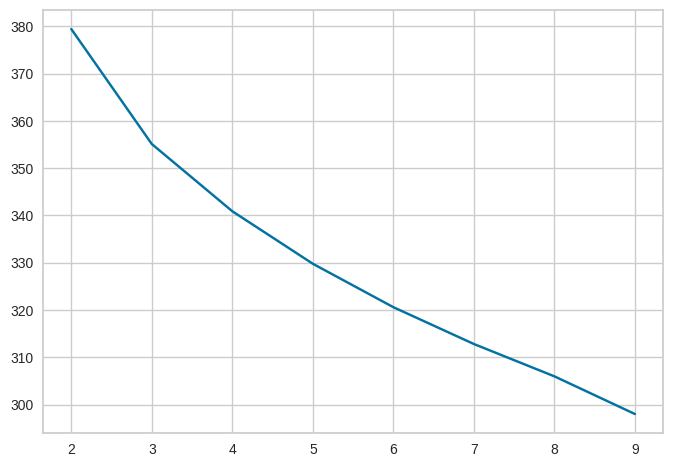

In [21]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))

З графіка видно, що "лікоть" на значенні 3, тому робимо висновок, що кластерів має бути 3

In [22]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(pca_df_mnist)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


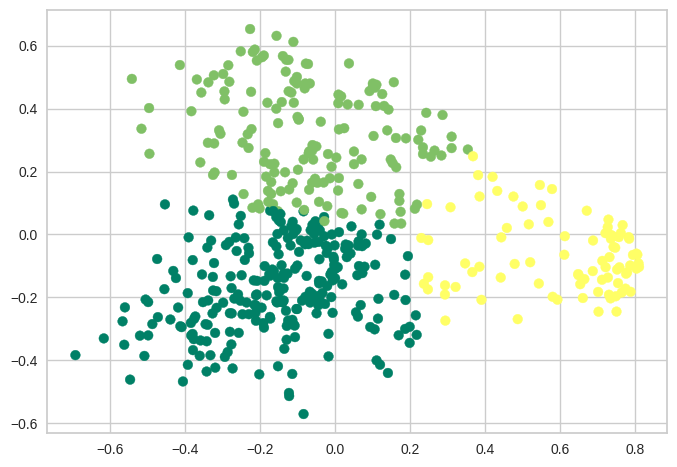

In [23]:
plt.scatter(pca_df_mnist[:,0], pca_df_mnist[:,1],
            c=KMeans(n_clusters=3).fit_predict(pca_df_mnist),
            cmap=plt.cm.summer)
plt.show()